In [110]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
with open("./soh/Combined_LabelledData_18_역률평균.json", "r", encoding="utf-8") as f:
    content = f.read()
    json_data = json.loads(content)

In [112]:
print(type(json_data))

<class 'dict'>


In [113]:
print(json_data['data'][0])

{'ITEM_NAME': '누적전력량', 'ITEM_VALUE': 838462, 'TIMESTAMP': '2020-09-16 00:00:00', 'LABEL_NAME': '주의'}


In [114]:
temporary = json_data['data'][:]

In [115]:
temp_list = []
for i in temporary:
    if i['ITEM_NAME'] == '역률평균':
        temp_list.append(i)

In [116]:
pd_list = pd.DataFrame(temp_list)

In [117]:
pd_list.count()

ITEM_NAME     53280
ITEM_VALUE    53280
TIMESTAMP     53280
LABEL_NAME    53280
dtype: int64

1. 시계열은 line plot이 기본입니다.
2. 노이즈를 제거하려면 이동평균선을 쓰는 경우가 많습니다.
3. 주가처럼 단위 시간 안의 오르내림이 중요하다면 candle chart를 쓰기도 하고, 그렇지 않다면 단위 시간별로 그룹지어 평균값을 쓰기도 합니다

No handles with labels found to put in legend.


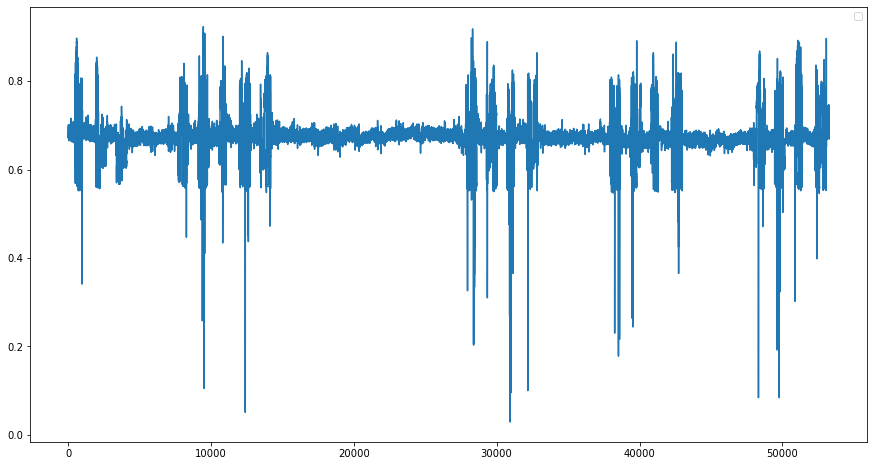

In [118]:
plt.figure(figsize=(15, 8)) #8인치 x 4인치
plt.plot(pd_list['ITEM_VALUE'])
#plt.plot(pd_list['TIMESTAMP'], pd_list['ITEM_VALUE']) 
plt.legend()

In [119]:
print(pd_list['ITEM_VALUE'])

0        0.676000
1        0.674000
2        0.675000
3        0.677000
4        0.674000
           ...   
53275    0.669112
53276    0.670384
53277    0.671791
53278    0.668714
53279    0.669761
Name: ITEM_VALUE, Length: 53280, dtype: float64


In [120]:
rolling = pd_list['ITEM_VALUE'].rolling(window=5).mean()

In [125]:
print(type(rolling))

<class 'pandas.core.series.Series'>


### 노이즈 제거를 위해 이동평균선을 적용했다. 5칸 만큼의 평균값을 대표로 값을 넣겠단게 맞겠지?

In [121]:
print(rolling)

0             NaN
1             NaN
2             NaN
3             NaN
4        0.675200
           ...   
53275    0.672420
53276    0.671465
53277    0.670992
53278    0.669909
53279    0.669952
Name: ITEM_VALUE, Length: 53280, dtype: float64


In [122]:
dropna_rolling = rolling.dropna()

In [123]:
print(dropna_rolling)

4        0.675200
5        0.675800
6        0.676400
7        0.677200
8        0.677200
           ...   
53275    0.672420
53276    0.671465
53277    0.670992
53278    0.669909
53279    0.669952
Name: ITEM_VALUE, Length: 53276, dtype: float64


No handles with labels found to put in legend.


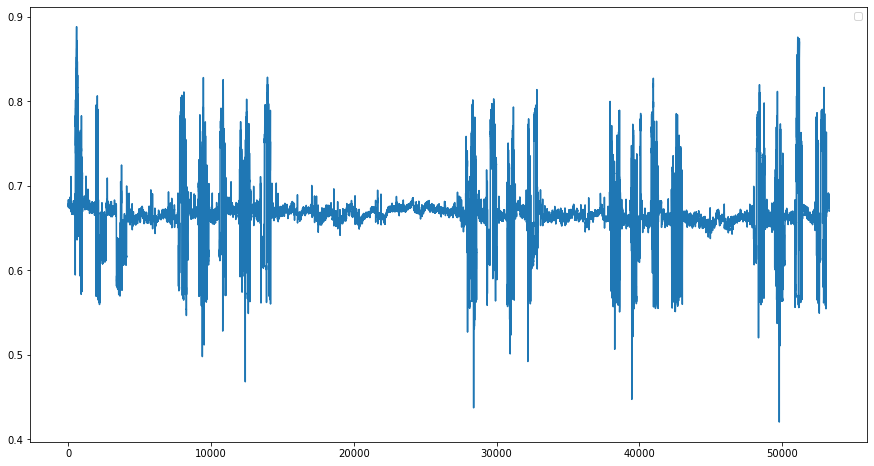

In [124]:
plt.figure(figsize=(15, 8)) #8인치 x 4인치
plt.plot(dropna_rolling) 
plt.legend()

# 1. 역률평균 (Power factor)를 이용하여 전처리해보기

### 1. 데이터 정규화